In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [3]:
data = pd.read_csv('housing_prices7.csv')

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
cat_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

for col in cat_ordinal:
    data[col] = data[col].astype('category')

In [6]:
y = data.pop('SalePrice')

In [7]:
X = data.drop(columns=['Id'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

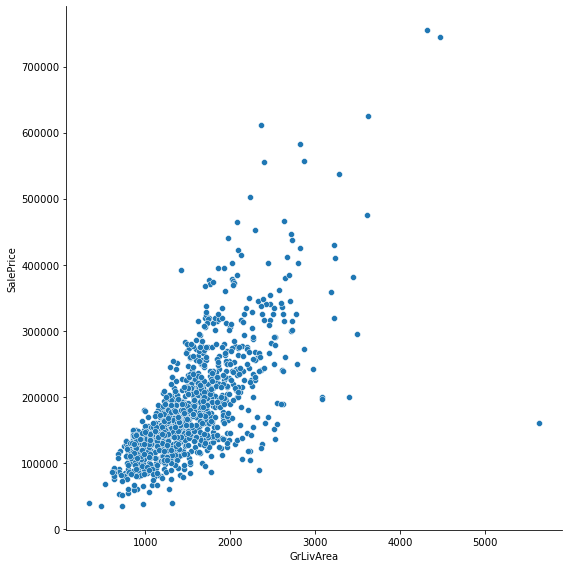

In [9]:
sns.relplot(x=X_train['GrLivArea'],y=y_train,height=8)

In [10]:
# GrLivArea * 120

dummy_model_predictions = X_test['GrLivArea'] *120
dummy_model_predictions

1260    201000
274      97920
51      141120
117     135000
789     250440
         ...  
801     143520
1292    284640
197     373440
780     150360
360     109440
Name: GrLivArea, Length: 292, dtype: int64

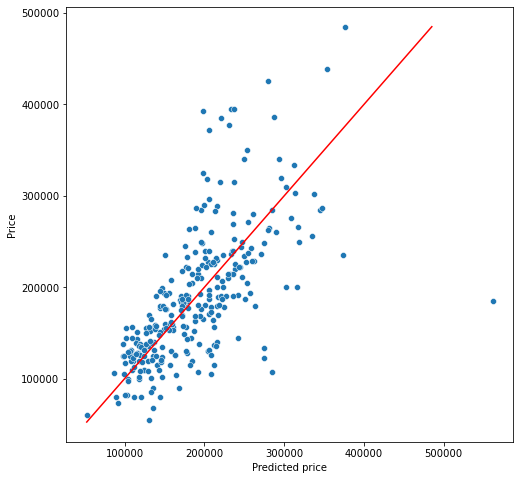

In [11]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Price')
    plt.xlabel('Predicted price')
    plt.show()

plot_predictions(y_test, dummy_model_predictions)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

dummy_mae = mean_absolute_error(y_true = y_test, y_pred = dummy_model_predictions)
dummy_rmse = mean_squared_error(y_true = y_test, y_pred = dummy_model_predictions, squared=False)
dummy_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dummy_model_predictions)
dummy_r2 = r2_score(y_true = y_test, y_pred = dummy_model_predictions)
dummy_msle = mean_squared_log_error(y_true = y_test, y_pred = dummy_model_predictions)

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [14]:
qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

In [15]:
numeric_pipe = make_pipeline(
    SimpleImputer(strategy='mean')
)
categorical_pipe_ordinal = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=[qualities]*10))
)
categorical_pipe_ordinal2 = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']))
)
categorical_pipe_onehot = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='NaN')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [16]:
preprocessor = make_column_transformer(
    (numeric_pipe,make_column_selector(dtype_include='number')),
    (categorical_pipe_ordinal,make_column_selector(dtype_include='category')),
    (categorical_pipe_onehot,make_column_selector(dtype_include='object'))
)

In [17]:
dt_pipeline = make_pipeline(preprocessor, 
                            DecisionTreeRegressor()).set_output(transform='pandas')

dt_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75470730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEnc...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75314AF0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75314BB0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [21]:
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75470730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEnc...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75314AF0>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75314BB0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [24]:
dt_predictions = dt_pipeline.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_log_error
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_msle = mean_squared_log_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [49]:
pd.DataFrame({"MAE": [dummy_mae, dt_mae],
              "RMSE": [dummy_rmse, dt_rmse],
              "MAPE": [dummy_mape, dt_mape],
              "R2": [dummy_r2, dt_r2],
              "MSLE": [dummy_msle, dt_msle]},
             index=["dummy_model", "decision_tree"])

,MAE,RMSE,MAPE,R2,MSLE
dummy_model,38588.380137,56174.560087,0.218908,0.400337,0.071644
decision_tree,26695.715753,44395.785204,0.144927,0.625448,0.038931


In [28]:
param_grid = {
    "decisiontreeregressor__criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "decisiontreeregressor__splitter": ['best', 'random'],
    "decisiontreeregressor__min_samples_leaf": range(2, 50)
    
}


In [29]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(dt_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75470730>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='None',
                                                                                                        strategy='constant')),...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA75314BB0>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__criterion': ['squared_error',
                                                              'friedman_mse',
                                                              'absolute_error',
                                                              'poisson'],
                         'decisiontreeregressor__min_samples_leaf': range(2, 50),
                         'decisiontreeregressor__splitter': ['best', 'random']},
             verbose=1)

In [30]:
search.best_params_

{'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__min_samples_leaf': 9,
 'decisiontreeregressor__splitter': 'best'}

In [31]:
# adding features

qualities = ['None', 'TA', 'Po', 'Fa', 'Gd', 'Ex']

# creating pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy='mean')
)
categorical_pipe_ordinal = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='None')),
    (OrdinalEncoder(categories=[qualities]*10))
)
categorical_pipe_onehot = make_pipeline(
    (SimpleImputer(strategy='constant',fill_value='NaN')),
    (OneHotEncoder(handle_unknown='ignore',sparse_output=False))
)

In [32]:
# preprocess the columns
preprocessor = make_column_transformer(
    (numeric_pipe,make_column_selector(dtype_include='number')),
    (categorical_pipe_ordinal,make_column_selector(dtype_include='category')),
    (categorical_pipe_onehot,make_column_selector(dtype_include='object'))
)

In [34]:
# import the feature selection with decision tree, preprocess and make pipe
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

selectfeatures = SelectFromModel(DecisionTreeRegressor())
scaler = StandardScaler()
decision_tree_2_pipeline = make_pipeline(
                            preprocessor,
                            selectfeatures, 
                            DecisionTreeRegressor()).set_output(transform='pandas')


In [35]:
# fit the pipe with the data
decision_tree_2_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA76C94280>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='None',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEnc...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NaN',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA76C94850>)])),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeRegressor())),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [39]:
# now we test the model performance
decision_tree_2_predictions = decision_tree_2_pipeline.predict(X_test)

decision_tree_2_mae = mean_absolute_error(y_true = y_test, y_pred = decision_tree_2_predictions)
decision_tree_2_rmse = mean_squared_error(y_true = y_test, y_pred = decision_tree_2_predictions, squared=False)
decision_tree_2_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = decision_tree_2_predictions)
decision_tree_2_r2 = r2_score(y_true = y_test, y_pred = decision_tree_2_predictions)

# set to dataframe
scoring = pd.DataFrame({"MAE": [dt_mae, decision_tree_2_mae],
              "RMSE": [dt_rmse, decision_tree_2_rmse],
              "MAPE": [dt_mape, decision_tree_2_mape],
              "R2": [dt_r2, decision_tree_2_r2]},
             index=["decision_tree_model", "decision_tree_2_tree"])
scoring

,MAE,RMSE,MAPE,R2
decision_tree_model,26695.715753,44395.785204,0.144927,0.625448
decision_tree_2_tree,28089.746575,47421.386664,0.151400,0.572657
